In [34]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score, auc, plot_roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris

In [12]:
iris = load_iris()

In [13]:
min_max_scaler = MinMaxScaler()
data = min_max_scaler.fit_transform(iris.data)
data = pd.DataFrame(data, columns=iris.feature_names)
data["target"] = iris.target

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[:-1]], data[data.columns[-1:]]
                                                    , test_size=0.3, random_state=1000)

In [5]:
file = open('train_model_lr.pkl','rb')

In [6]:
model = pickle.load(file)

In [25]:
y_scores = model.decision_function(X_test)
print(y_scores.shape)

(45, 3)


In [31]:
model.classes_

array([0, 1, 2])

AUC: [1.         0.70258621 0.99794239]


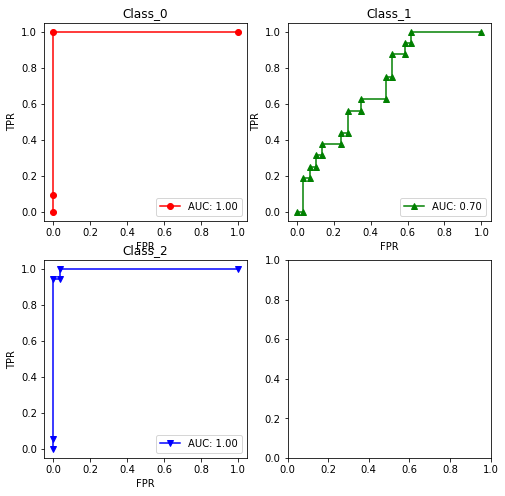

In [38]:

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
colors = ["r", "g", "b", "k"]
markers = ["o", "^", "v", "+"]
 
y_test = label_binarize(y_test, classes=model.classes_)
for i in range(3):
    # 计算每个类别的FPR, TPR 
    fpr, tpr, thr = roc_curve(y_test[:, i], y_scores[:, i])
#     print("classes_{}, fpr: {}, tpr: {}, threshold: {}".format(i, fpr, tpr, thr))
    # 绘制ROC曲线，并计算AUC值
    axes[int(i / 2), i % 2].plot(fpr, tpr, color=colors[i], marker=markers[i], label="AUC: {:.2f}".format(auc(fpr, tpr)))
    axes[int(i / 2), i % 2].set_xlabel("FPR")
    axes[int(i / 2), i % 2].set_ylabel("TPR")
    axes[int(i / 2), i % 2].set_title("Class_{}".format(model.classes_[i]))
    axes[int(i / 2), i % 2].legend(loc="lower right")
 
print("AUC:", roc_auc_score(y_test, model.decision_function(X_test), multi_class="ovr", average=None))